## 实验题目3 四阶龙格-库塔(Runge-Kutta)方法

### 参考资料

julia ordinary differential equations tutorial https://diffeq.sciml.ai/stable/tutorials/ode_example/

intro to solving differential equations in julia https://www.youtube.com/watch?v=KPEqYtEd-zY

julia ode solver type: Runge-Kutta https://diffeq.sciml.ai/stable/solvers/ode_solve/#Explicit-Runge-Kutta-Methods

julia ode problem type https://diffeq.sciml.ai/stable/types/ode_types/#ode_prob

julia ode speed up perf https://diffeq.sciml.ai/stable/features/performance_overloads/#performance_overloads

julia ode common solver option https://diffeq.sciml.ai/stable/basics/common_solver_opts/#solver_options



### 代码实现

In [16]:
using DifferentialEquations
using Plots

### 测试代码

#### Test 1 - Simple

In [17]:
# DifferentialEquations.jl library
# f(u, p, t) = 1.01 * u
# u0 = 1 / 2
# tspan = (0.0, 1.0)
# prob = ODEProblem(f, u0, tspan)
# sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# plot(sol, linewidth=5, title="Solution to the linear ODE with a thick line",
#     xaxis="Time (t)", yaxis="u(t) (in μm)", label="My Thick Line!") # legend=false
# plot!(sol.t, t -> 0.5 * exp(1.01t), lw=3, ls=:dash, label="True Solution!")

### 实验题目

In [18]:
function show_result(libdf::Function, mydf::Function, ansf::Function, tspan, u0, reltol, abstol)
    prob = ODEProblem(libdf, u0, tspan)
    alg = RK4()
    sol = solve(prob, alg, reltol, abstol)
    plot(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="solution")
    display(plot!(ansf, color=:deepskyblue, label="true result"))
end

show_result (generic function with 3 methods)

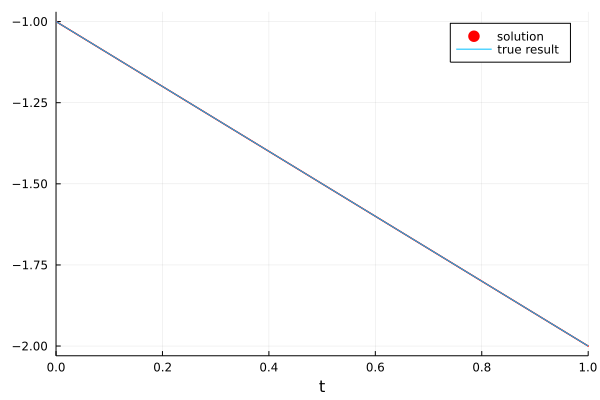

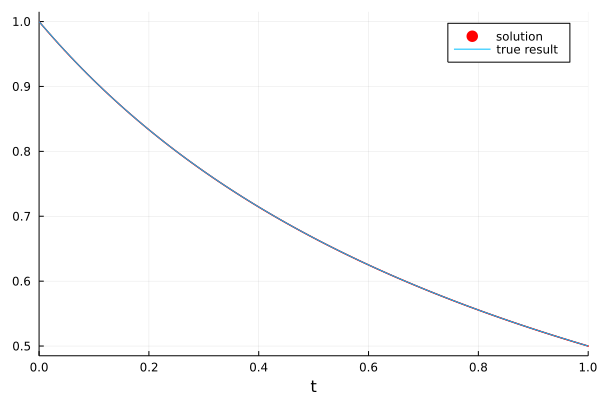

In [19]:
# define a problem: 
# 
# f(u,p,t) = 1.01*u
# u0 = 1/2
# tspan = (0.0,1.0)
# prob = ODEProblem(f,u0,tspan)
#
# select a solver to solve it:
# alg = RK4()
# solve(prob,alg)
f(y, p, x) = x + y
xspan = (0.0, 1.0)
y0 = -1.0
prob = ODEProblem(f, y0, xspan)
alg = RK4()
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
plot(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="solution")
f(x) = -x - 1
display(plot!(f, color=:deepskyblue, label="true result"))

f(y, p, x) = -y^2
xspan = (0.0, 1.0)
y0 = 1.0
prob = ODEProblem(f, y0, xspan)
alg = RK4()
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
plot(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="solution")
f(x) = 1 / (x + 1)
display(plot!(f, color=:deepskyblue, label="true result"))


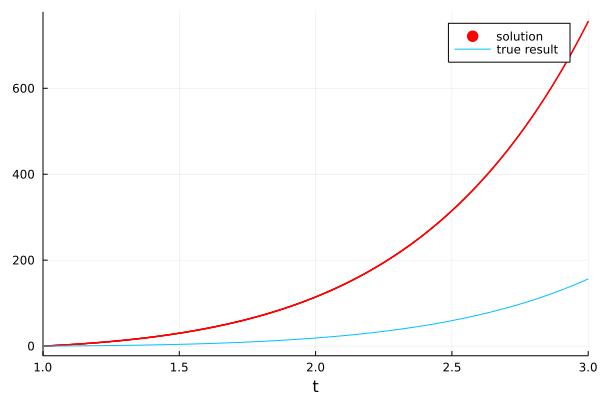

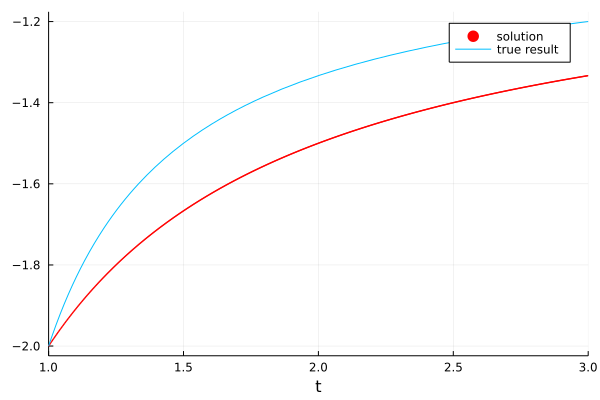

In [21]:
# Todo: shift 1 unit for better plot view
f(y, p, x) = 2 * y / x + x^2 * exp(x)
xspan = (1.0, 3.0)
# t = x - 1
# x = t + 1
tspan = (0.0, 2.0)
f(y, p, t) = 2 * y / (t + 1) + (t + 1)^2 * exp(t + 1)
y0 = 0.0
prob = ODEProblem(f, y0, xspan)
alg = RK4()
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
plot(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="solution")
f(x) = x^2 * (exp(x) - exp(1))
display(plot!(f, color=:deepskyblue, label="true result"))

f(y, p, x) = (y^2 + y) / x
xspan = (1.0, 3.0)
# t = x - 1
# x = t + 1
tspan = (0.0, 2.0)
f(y, p, t) = (y^2 + y) / (t + 1)
y0 = -2
prob = ODEProblem(f, y0, xspan)
alg = RK4()
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
plot(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="solution")
f(x) = 2x / (1 - 2x)
display(plot!(f, color=:deepskyblue, label="true result"))

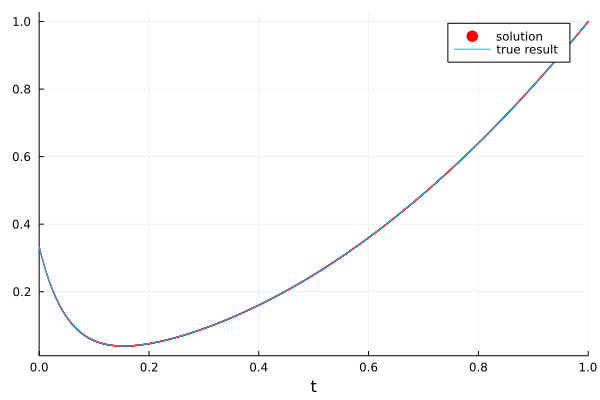

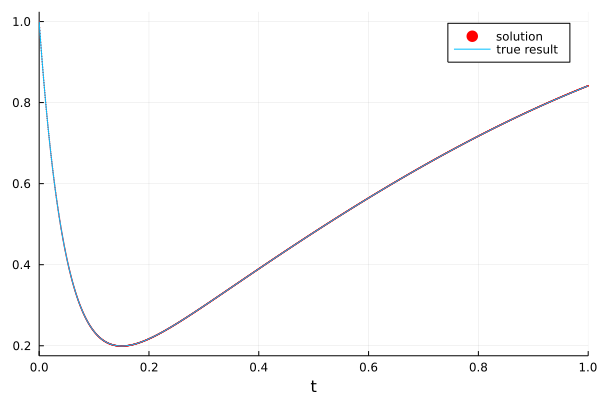

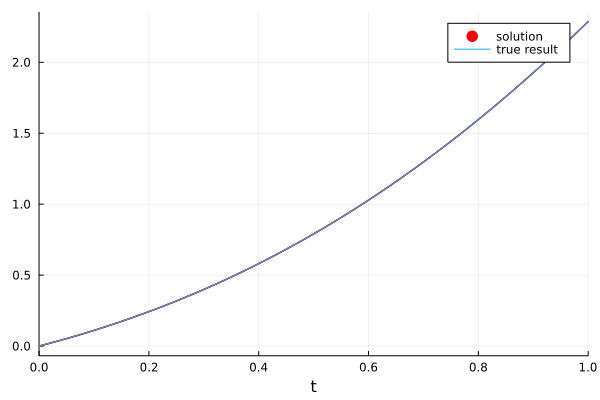

In [23]:
f(y, p, x) = -20(y - x^2) + 2x
xspan = (0.0, 1.0)
y0 = 1 / 3
prob = ODEProblem(f, y0, xspan)
alg = RK4()
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
plot(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="solution")
f(x) = x^2 + 1 / 3 * exp(-20x)
display(plot!(f, color=:deepskyblue, label="true result"))


f(y, p, x) = -20y + 20sin(x) + cos(x)
xspan = (0.0, 1.0)
y0 = 1.0
prob = ODEProblem(f, y0, xspan)
alg = RK4()
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
plot(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="solution")
f(x) = exp(-20x) + sin(x)
display(plot!(f, color=:deepskyblue, label="true result"))


f(y, p, x) = -20(y - exp(x)sin(x)) + exp(x) * (sin(x) + cos(x))
xspan = (0.0, 1.0)
y0 = 0.0
prob = ODEProblem(f, y0, xspan)
alg = RK4()
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
plot(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="solution")
f(x) = exp(x) * sin(x)
display(plot!(f, color=:deepskyblue, label="true result"))


### 思考题

1. 对实验 1，数值解和解析解相同吗？为什么？试加以说明。
2. 对实验 2， N 越大越精确吗？试加以说明。
3. 对实验 3， N 较小会出现什么现象？试加以说明